In [ ]:
using Plots

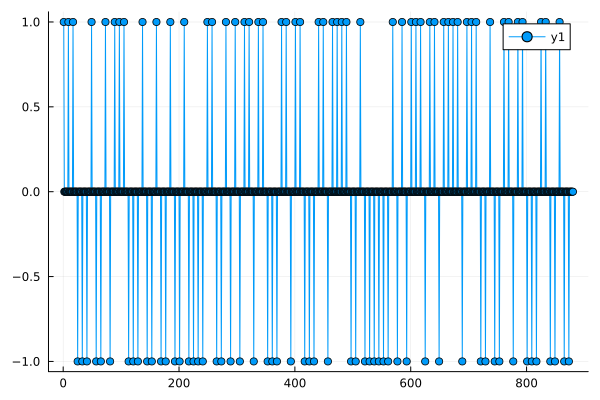

In [2]:
num_symbols = 101
sps = 8 # samples per symbol

# Encode the message
msg = "Hello World"
bytes = codeunits(msg) # Get the code units of the string

# Convert bytes to bits
bits = BitArray(undef, 8*length(bytes))
for i in 1:length(bytes)
    for j in 1:8
        bits[8*(i-1)+j] = (bytes[i] & (1 << (8-j))) > 0
    end
end

preamble = [1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0]
preamble2 = vcat(preamble, preamble)

data = vcat(preamble2, bits)

x = Float64[]
for bit in data
    pulse = zeros(Float64, sps)
    pulse[1] = bit*2-1 # Set the first value to either 1 or -1
    x = vcat(x, pulse) # Add the 8 samples to the signal
end

plot(x, marker=:circle, line=:path, grid=true)


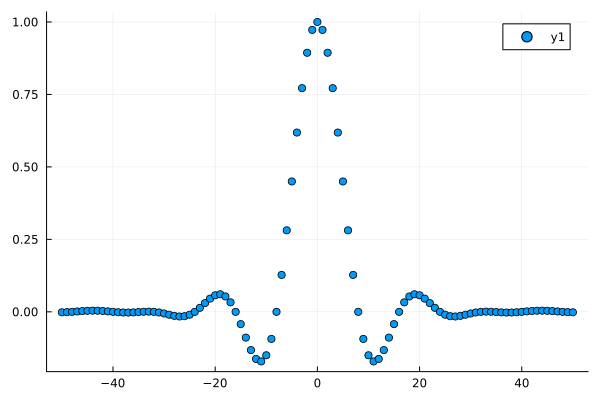

In [4]:
num_taps = 101
β = 0.35
Ts = 8 # Assuming samples per symbol (sps) is 8
t = -50:50 # Julia includes the end in its range, matching Python's -50 to 50

# Define the raised-cosine filter
h = sinc.(t ./ Ts) .* cos.(π .* β .* t ./ Ts) ./ (1 .- (2 .* β .* t ./ Ts) .^ 2)
# Handle the division by zero issue by replacing NaN with the correct limit value
h[findall(x -> isnan(x), h)] .= sinc(β) / Ts

plot(t, h, seriestype=:scatter, grid=true)


In [9]:
using DSP

In [14]:

# Assuming x and h are already defined in your Julia session from previous steps
x_shaped = conv(x, h)

plot(x_shaped, marker=:circle, linestyle=:solid)

for i in 0:num_symbols-1
    plot!([i*sps + num_taps ÷ 2, i*sps + num_taps ÷ 2], [0, x_shaped[i*sps + num_taps ÷ 2 + 1]], color=:red)
end

grid(true)
display(plot())


LoadError: BoundsError: attempt to access Tuple{Bool} at index [2]

# References
- [ ] [modulation demodulation.ipynb](https://gitlab.eurecom.fr/florian.kaltenberger/comlab/-/blob/main/notebooks/modulation%20demodulation.ipynb)